<a href="https://colab.research.google.com/github/zabir-nabil/eeg-rsenet/blob/master/bci_4_tl_sub1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zabiralnazi@yahoo.com

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
% cd /content/drive/My Drive/subject 1/

/content/drive/My Drive/subject 1


In [0]:
import glob

cls1_ch1 = []
cls1_ch2 = []
cls1_ch3 = []

cls2_ch1 = []
cls2_ch2 = []
cls2_ch3 = []

for f in glob.glob('/content/drive/My Drive/subject 1/lvl 1/ch 0/*.png'):
  cls1_ch1.append(f)
  
for f in glob.glob('/content/drive/My Drive/subject 1/lvl 1/ch 1/*.png'):
  cls1_ch2.append(f)
  
for f in glob.glob('/content/drive/My Drive/subject 1/lvl 1/ch 2/*.png'):
  cls1_ch3.append(f)
  
for f in glob.glob('/content/drive/My Drive/subject 1/lvl 2/ch 0/*.png'):
  cls2_ch1.append(f)
  
for f in glob.glob('/content/drive/My Drive/subject 1/lvl 2/ch 1/*.png'):
  cls2_ch2.append(f)
  
for f in glob.glob('/content/drive/My Drive/subject 1/lvl 2/ch 2/*.png'):
  cls2_ch3.append(f)

In [0]:
cls1_ch1.sort()
cls1_ch2.sort()
cls1_ch3.sort()

cls2_ch1.sort()
cls2_ch2.sort()
cls2_ch3.sort()

In [0]:
print(len(cls1_ch1))
print(len(cls1_ch2))
print(len(cls1_ch3))

print(len(cls2_ch1))
print(len(cls2_ch2))
print(len(cls2_ch3))

60
60
60
60
60
60


In [0]:
import cv2

x1 = []
x2 = []
x3 = []

y = []

for i in range(len(cls1_ch1)):
  x1.append(cv2.resize(cv2.imread(cls1_ch1[i]), (224, 224)))
  x2.append(cv2.resize(cv2.imread(cls1_ch2[i]), (224, 224)))
  x3.append(cv2.resize(cv2.imread(cls1_ch3[i]), (224, 224)))
  
  y.append(0)
  
for i in range(len(cls2_ch1)):
  x1.append(cv2.resize(cv2.imread(cls2_ch1[i]), (224, 224)))
  x2.append(cv2.resize(cv2.imread(cls2_ch2[i]), (224, 224)))
  x3.append(cv2.resize(cv2.imread(cls2_ch3[i]), (224, 224)))
  
  y.append(1)

In [0]:
##################################------------------------------------------------######################################

In [0]:
# customization for multi-channel

In [0]:
! pip install Augmentor 

In [0]:
z = list(zip(x1,x2,x3))

In [0]:
print(len((z)))

120


In [0]:
def unzip(z):
  x1_p = [a[0] for a in z]
  x2_p = [a[1] for a in z]
  x3_p = [a[2] for a in z]
  return x1_p, x2_p, x3_p

In [0]:
import random
random.seed(1997)

In [0]:
import Augmentor

p = Augmentor.DataPipeline(z, y)

p.rotate(probability=0.2, max_left_rotation=5, max_right_rotation=5)
p.flip_left_right(probability=0.2)
p.zoom_random(probability=0.1, percentage_area=0.8)
p.flip_top_bottom(probability=0.3)
p.gaussian_distortion(probability=0.05, grid_width=4, grid_height=4, magnitude=3, corner='bell', method='in', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)
p.random_brightness(probability=0.05, min_factor=0.7, max_factor=1.3)
p.random_color(probability=0.05, min_factor=0.6, max_factor=0.9)
p.random_contrast(probability=0.05, min_factor=0.6, max_factor=0.9)
p.random_distortion(probability=0.2, grid_width=4, grid_height=4, magnitude=2)

augmented_images, labels = p.sample(1000)

In [0]:
x1_p, x2_p, x3_p = unzip(augmented_images)
y_p = labels

In [0]:
print(augmented_images[9][2].shape)

(224, 224, 3)


In [0]:
print(len(x1_p))
print(len(x2_p))
print(len(x3_p))

1000
1000
1000


In [0]:
x1.extend(x1_p)
x2.extend(x2_p)
x3.extend(x3_p)
y.extend(y_p)

In [0]:
print(len(x1))
print(len(x2))
print(len(x3))
print(len(y))

1120
1120
1120
1120


In [0]:
import random
random.seed(100)
zz = list(zip(x1, x2, x3, y))
random.shuffle(zz)

In [0]:
z1 = [a[0] for a in zz]
z2 = [a[1] for a in zz]
z3 = [a[2] for a in zz]
zy = [a[3] for a in zz]

In [0]:
split = int(0.8*(len(z1)))
print(split)

896


In [0]:
x1_tr = z1[:split]
x2_tr = z2[:split]
x3_tr = z3[:split]
y_tr = zy[:split]

x1_ts = z1[split:]
x2_ts = z2[split:]
x3_ts = z3[split:]
y_ts = zy[split:]

In [0]:
import numpy as np
x1_tr = np.array(x1_tr, dtype = 'float32')
x2_tr = np.array(x2_tr, dtype = 'float32')
x3_tr = np.array(x3_tr, dtype = 'float32')
y_tr = np.array(y_tr, dtype = 'float32')
y_ts = np.array(y_ts, dtype = 'float32')

In [0]:
print(np.mean(x1_tr))

152.127


In [0]:
x1_tr = x1_tr/255.
x2_tr = x2_tr/255.
x3_tr = x3_tr/255.

In [0]:
np.mean(x1_tr)

0.5965752

In [0]:
x1_ts = np.array(x1_ts, dtype = 'float32')
x2_ts = np.array(x2_ts, dtype = 'float32')
x3_ts = np.array(x3_ts, dtype = 'float32')

In [0]:
print(np.mean(x1_ts))

151.80609


In [0]:
x1_ts = x1_ts/255.
x2_ts = x2_ts/255.
x3_ts = x3_ts/255.

In [0]:
print(np.mean(x1_ts))

0.59531933


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

model = ResNet50(weights='imagenet', include_top=False, pooling="avg")

In [0]:
x1_tr.shape

(896, 224, 224, 3)

In [0]:
fx1_tr = model.predict(x1_tr)
print(fx1_tr.shape)


fx2_tr = model.predict(x2_tr)
print(fx2_tr.shape)

fx3_tr = model.predict(x3_tr)
print(fx3_tr.shape)

(896, 2048)
(896, 2048)
(896, 2048)


In [0]:
fx_tr = np.concatenate((fx1_tr, fx2_tr, fx3_tr), axis=-1)
print(fx_tr.shape)

(896, 6144)


In [0]:
fx1_ts = model.predict(x1_ts)
print(fx1_ts.shape)


fx2_ts = model.predict(x2_ts)
print(fx2_ts.shape)

fx3_ts = model.predict(x3_ts)
print(fx3_ts.shape)

(224, 2048)
(224, 2048)
(224, 2048)


In [0]:
fx_ts = np.concatenate((fx1_ts, fx2_ts, fx3_ts), axis=-1)
print(fx_ts.shape)

(224, 6144)


In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [0]:
X_2d = tsne.fit_transform(fx_tr)

In [0]:
X_2d.shape

(896, 2)

<Figure size 1440x1008 with 0 Axes>

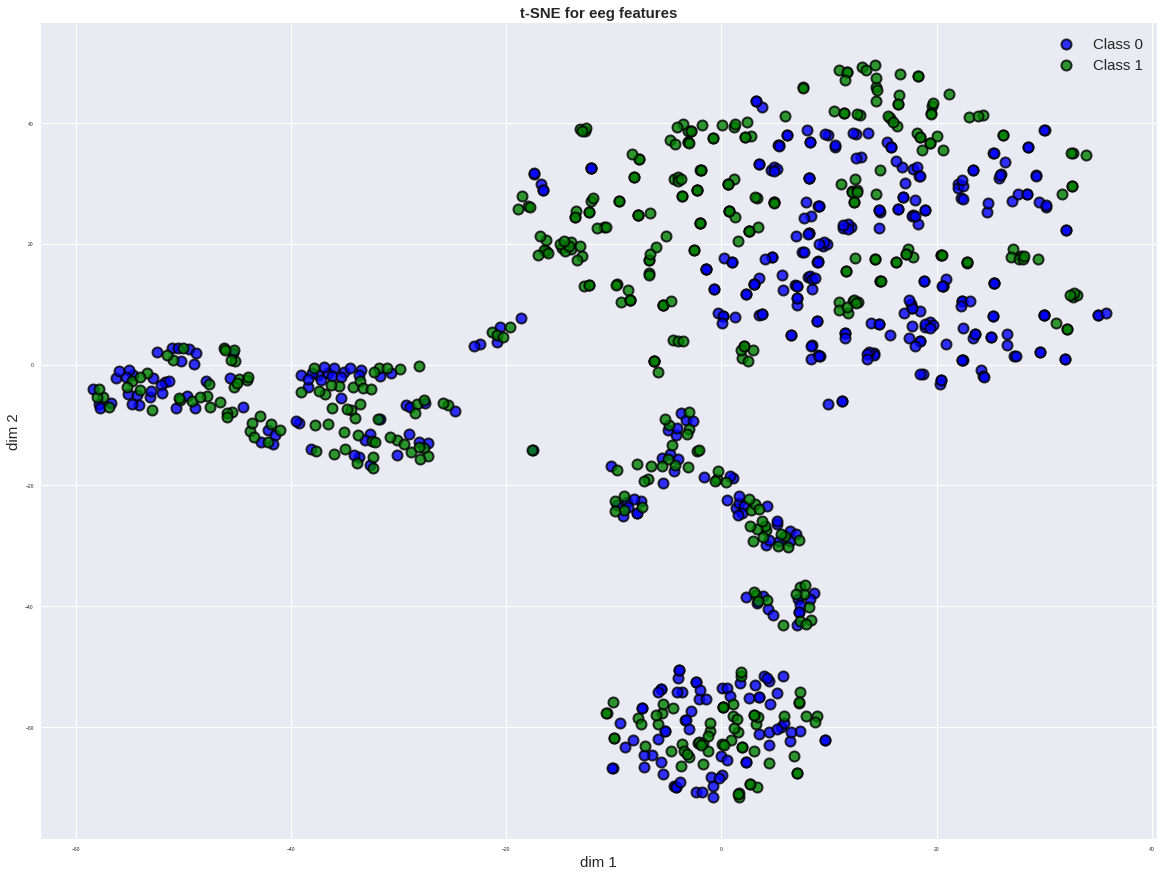

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))

B_SIZE = 10
axis_font = {'fontname':'Arial', 'size':'30'}
plt.rc('font', size=B_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=B_SIZE+5)     # fontsize of the axes title
plt.rc('axes', labelsize=B_SIZE+5)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=B_SIZE-5)    # fontsize of the tick labels
plt.rc('ytick', labelsize=B_SIZE-5)    # fontsize of the tick labels
plt.rc('legend', fontsize=B_SIZE+5)    # legend fontsize
plt.rc('figure', titlesize=B_SIZE)  # fontsize of the figure title
#plt.rc('xlabel', titlesize=B_SIZE+10)
#plt.rc('ylabel', titlesize=B_SIZE+10)
labels = [0, 1]
class_label = ['Class 0', 'Class 1']

plt.figure(figsize=(20,15))
plt.title('t-SNE for eeg features', fontweight='bold')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
colors = 'b', 'g'
for i, c, label in zip(labels, colors, class_label):
    plt.scatter(X_2d[y_tr == i, 0], X_2d[y_tr == i, 1], c=c,
                label=label, alpha=0.8, linewidths=2, edgecolors ='k',
               s=100)
plt.legend()
plt.savefig('tsne_feature_plot.png', bbox_inches='tight')
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(fx_tr)

print(scaler.mean_)


Xtr = scaler.transform(fx_tr)

[0.00000000e+00 0.00000000e+00 1.62961920e-05 ... 2.00998279e+00
 0.00000000e+00 0.00000000e+00]


In [0]:
print(np.mean(Xtr)) # MEAN IS ZERO 
print(np.var(Xtr)) # VARIANCE IS 1

4.1798645e-09
0.364583


In [0]:
class_weight = {0: 0.5, 1: 0.5} 

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf1 = svm.SVC(kernel='linear', C=10, class_weight = class_weight)
scores = cross_val_score(clf1, Xtr, y_tr, cv=10)
print('SVM 10 fold CV Accuracy: ', scores.mean(), scores.std())



from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0, class_weight = class_weight)

scores = cross_val_score(clf2, Xtr, y_tr, cv=10)
print('Random Forest 10 fold Accuracy: ', scores.mean(), scores.std())



from sklearn import tree
clf3 = tree.DecisionTreeClassifier()

scores = cross_val_score(clf3, Xtr, y_tr, cv=10)
print('Decision Tree 10 fold Accuracy: ', scores.mean(), scores.std())


from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(neigh, Xtr, y_tr, cv=10)
print('KNN 10 fold Accuracy: ', scores.mean(), scores.std())

SVM 10 fold CV Accuracy:  0.9497245201739585 0.01834245265625264
Random Forest 10 fold Accuracy:  0.8391111385493408 0.044957787372477784
Decision Tree 10 fold Accuracy:  0.7846270458630009 0.052032461612877265
KNN 10 fold Accuracy:  0.8649161076127369 0.03530213389821354


In [0]:
# test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(fx_ts)

print(scaler.mean_)


Xts = scaler.transform(fx_ts)

[0.00000000e+00 0.00000000e+00 1.05468394e-05 ... 2.00974587e+00
 0.00000000e+00 0.00000000e+00]


In [0]:
print(np.mean(Xts)) # MEAN IS ZERO 
print(np.var(Xts)) # VARIANCE IS 1

6.181099e-10
0.34895825


In [0]:
clf1.fit(Xtr,y_tr)
y_p1 = clf1.predict(Xts)

In [0]:
from sklearn.metrics import recall_score, average_precision_score, f1_score, accuracy_score, confusion_matrix
print('SVM test result:\nrecall\nprecision\nf1\naccuracy\nconfusion_matrix')
print(recall_score(y_ts, y_p1))
print(average_precision_score(y_ts, y_p1))
print(f1_score(y_ts, y_p1))
print(accuracy_score(y_ts, y_p1))
print(confusion_matrix(y_ts, y_p1))

SVM test result:
recall
precision
f1
accuracy
confusion_matrix
0.9380530973451328
0.9270484533205773
0.9464285714285714
0.9464285714285714
[[106   5]
 [  7 106]]


In [0]:
clf2.fit(Xtr,y_tr)
y_p1 = clf2.predict(Xts)

In [0]:
from sklearn.metrics import recall_score, average_precision_score, f1_score, accuracy_score, confusion_matrix
print('RF test result:\nrecall\nprecision\nf1\naccuracy\nconfusion_matrix')
print(recall_score(y_ts, y_p1))
print(average_precision_score(y_ts, y_p1))
print(f1_score(y_ts, y_p1))
print(accuracy_score(y_ts, y_p1))
print(confusion_matrix(y_ts, y_p1))

RF test result:
recall
precision
f1
accuracy
confusion_matrix
0.7610619469026548
0.7155477818641536
0.7713004484304933
0.7723214285714286
[[87 24]
 [27 86]]


In [0]:
clf3.fit(Xtr,y_tr)
y_p1 = clf3.predict(Xts)

In [0]:
from sklearn.metrics import recall_score, average_precision_score, f1_score, accuracy_score, confusion_matrix
print('DTree test result:\nrecall\nprecision\nf1\naccuracy\nconfusion_matrix')
print(recall_score(y_ts, y_p1))
print(average_precision_score(y_ts, y_p1))
print(f1_score(y_ts, y_p1))
print(accuracy_score(y_ts, y_p1))
print(confusion_matrix(y_ts, y_p1))

DTree test result:
recall
precision
f1
accuracy
confusion_matrix
0.7699115044247787
0.7036354714219176
0.7665198237885462
0.7633928571428571
[[84 27]
 [26 87]]


In [0]:
neigh.fit(Xtr,y_tr)
y_p1 = neigh.predict(Xts)

In [0]:
from sklearn.metrics import recall_score, average_precision_score, f1_score, accuracy_score, confusion_matrix
print('KNN test result:\nrecall\nprecision\nf1\naccuracy\nconfusion_matrix')
print(recall_score(y_ts, y_p1))
print(average_precision_score(y_ts, y_p1))
print(f1_score(y_ts, y_p1))
print(accuracy_score(y_ts, y_p1))
print(confusion_matrix(y_ts, y_p1))

KNN test result:
recall
precision
f1
accuracy
confusion_matrix
0.8849557522123894
0.8016960102625121
0.8620689655172413
0.8571428571428571
[[ 92  19]
 [ 13 100]]


In [0]:
# ref: https://stackoverflow.com/questions/51231576/tensorflow-keras-expected-global-average-pooling2d-1-input-to-have-shape-1-1